In [12]:
import numpy as np
mute = np.loadtxt("powtable_AGN_all.dat")
np.savetxt("powtable_AGN_all_z.txt", mute[:,0])
np.savetxt("powtable_AGN_all_k.txt", mute[:,1])
np.savetxt("powtable_AGN_all_P.txt", mute[:,2])

mute = np.loadtxt("powtable_AGN_all.dat")
np.savetxt("powtable_AGN_all_z.txt", mute[:,0])
np.savetxt("powtable_AGN_all_k.txt", mute[:,1])
np.savetxt("powtable_AGN_all_P.txt", mute[:,2])

mute = np.loadtxt("powtable_AGN_all.dat")
np.savetxt("powtable_AGN_all_z.txt", mute[:,0])
np.savetxt("powtable_AGN_all_k.txt", mute[:,1])
np.savetxt("powtable_AGN_all_P.txt", mute[:,2])

In [49]:
mute = np.loadtxt("powtable_AGN_all.dat")
mute1 = np.loadtxt("powtable_DMONLY_all.dat")

In [62]:
mask = mute[:,1] <20.

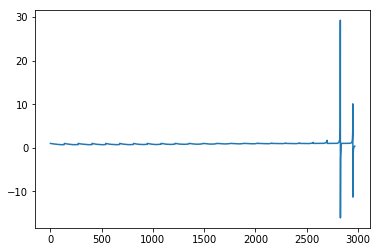

In [63]:
plt.plot(mute[mask,2]/mute1[mask,2])

In [80]:
cosmo = {'omega_M_0':0.286, 
         'omega_lambda_0':1-0.286,
         'omega_k_0':0.0, 
         'omega_b_0' : 0.048,
         'h':0.69,
 'omega_n_0' : 0.0,
 'N_nu' : 0,
         'sigma_8' : 0.82,
         'n': 0.96}
import cosmolopy.distance as cd

import os
import scipy
from scipy import interpolate
dirname = "./"

# File names
DM_FILENAME = os.path.join(dirname, 'powtable_DMONLY_all.dat')
UPPER_FILENAME = os.path.join(dirname, 'powtable_NOSN_all.dat')
LOWER_FILENAME = os.path.join(dirname, 'powtable_AGN_all.dat')


MIN_K_MODULATION = 0.05
MIN_Z_MODULATION = 0.0
MAX_Z_MODULATION = 5.0


def _load_file(filename):
        data = np.loadtxt(filename, comments='%').T
        z = data[0]
    
        k = data[1]
        P = data[2]
        out_z = np.unique(data[0])
        out_z = out_z[out_z < 3.1]
        kmin = k.min()
        kmax = k.max()
        nk_out = 100
        nz_out = out_z.size
        out_k = np.linspace(np.log10(kmin), np.log10(kmax), nk_out)
        out_P = np.zeros((nk_out, nz_out))

        for i, z_i in enumerate(out_z):
            w = (z == z_i)
            k_i = k[w]
            P_i = P[w]
            # if z_i==0.5:
            # 	import pylab
            # 	pylab.loglog(k_i, P_i, label=filename)
            ok = P_i > 0
            k_i = np.log10(k_i[ok])
            P_i = np.log10(P_i[ok])
            S = interpolate.InterpolatedUnivariateSpline(
                k_i, P_i)  # , s=3)
            P_fit = S(out_k)
            out_P[:, i] = P_fit
        out_l = np.zeros(len(out_k)*len(out_z))
        count_i = 0
        count_j = 0
        for i in range(len(out_l)):
            out_k
            out_l[i] = 10**out_k[count_j]/0.7*cd.comoving_distance(out_z[count_i], **cosmo)
            count_i+=1
            if count_i==14:
                count_i=0
                count_j+=1
        return out_k, out_z, out_P, out_l


dm_k, dm_z, dm_P,dm_l =_load_file(DM_FILENAME)
#np.savetxt("powtable_DMONLY_all_z.txt", dm_z)
#np.savetxt("powtable_DMONLY_all_k.txt", dm_k)
a = open("powtable_DMONLY_all_P.txt",'w')
for pm in dm_P.reshape(len(dm_k)*len(dm_z)):
    a.write("{0:2.8f} \n".format(pm))
a.close()


dm_k, dm_z, dm_P,dm_l =_load_file(LOWER_FILENAME)
#np.savetxt("powtable_AGN_all_z.txt", dm_z)
#np.savetxt("powtable_AGN_all_k.txt", dm_k)

a = open("powtable_AGN_all_P.txt",'w')
for pm in dm_P.reshape(len(dm_k)*len(dm_z)):
    a.write("{0:2.8f} \n".format(pm))
a.close()

dm_k, dm_z, dm_P,dm_l =_load_file(UPPER_FILENAME)

a = open("powelle.txt",'w')
for pm in dm_l.reshape(len(dm_k)*len(dm_z)):
    a.write("{0:2.8f} \n".format(pm))
    
a = open("powtable_NOSN_all_P.txt",'w')
for pm in dm_P.reshape(len(dm_k)*len(dm_z)):
    a.write("{0:2.8f} \n".format(pm))
a.close()
np.savetxt("powtable_z.txt", dm_z)
np.savetxt("powtable_k.txt", np.log10(10**dm_k))
#np.savetxt("powtable_NOSN_all_P.txt", dm_P.reshape(len(dm_k)*len(dm_z)))

In [79]:
dm_k[0],np.log10(10**dm_k)[0]

(-1.2018201321381388, -1.2018201321381388)

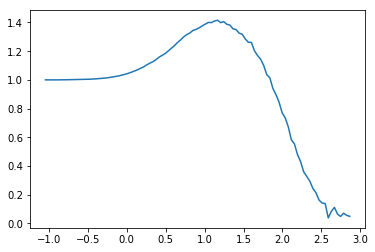

In [563]:
x0 = 1./cd.comoving_distance(0.5, **cosmo)

mute_agn = np.loadtxt("powtable_DMONLY_all_P.txt")
yy = mute_agn.reshape(len(dm_k),len(dm_z))[:,3]
h = 0.7
yy_agn = 10**yy*10#(10**dm_k/h)**2#**3
x = np.log10(10**dm_k/h)
ell = 10**dm_k/h/x0/1000
#plt.plot(x,yy_agn,label='dm')

mute_agn1 = np.loadtxt("powtable_NOSN_all_P.txt")
mute_agn1 = np.loadtxt("powtable_AGN_all_P.txt")

yy = mute_agn1.reshape(len(dm_k),len(dm_z))[:,3]
h = 0.7
yy_agn1 = 10**yy*10#(10**dm_k/h)**2#**3
plt.plot(x,yy_agn/yy_agn1,label='sn')
f = yy_agn/yy_agn1
x = np.log10(10**dm_k/h)
ell = 10**dm_k/h/x0/1000
import scipy
from scipy import interpolate
#print x,f
fd = interpolate.interp1d(x,f)

In [572]:
np.log10(ell*x0)

array([-3.28451799, -2.98348778, -2.80739817, ...,  0.71535162,
        0.71539505,  0.71543849])

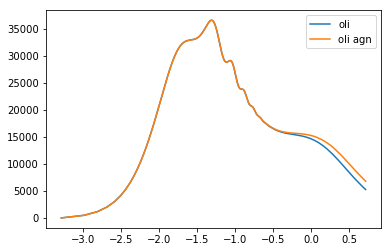

In [573]:
x0 = 1./cd.comoving_distance(0.5, **cosmo)


mute = np.loadtxt("../pk.txt")
ell = np.exp(mute[:,0])-0.5
logk_real = np.log(x0*ell)
one_over_w = (mute[:,1]/np.exp(mute[:,0]))[0]
logk = mute[:,2]
smoothing_factor_k = (np.sqrt(np.pi*((2*ell+1)*x0))/np.pi**2)
smoothing_factor_k = (np.sqrt(np.pi*((2*ell+1)*one_over_w))/np.pi**2)

smoothing_factor_l = (np.sqrt(np.pi*((2*ell+1)))/np.pi**2)

#pow(exp(ln_k),2.0)
yy=mute[:,-1]*smoothing_factor_l**2#**5#/(kk)**1.5/(4)/np.pi#/(4*np.pi)
#plt.plot(logk_real ,yy, label ='oli')
plt.plot(np.log10(ell*x0)  ,(yy), label ='oli')
import copy
yy1 = copy.copy(yy)
mask = (np.log10(ell*x0)>min(x)) & (np.log10(ell*x0)<max(x))

yy1[mask] =yy[mask]*fd(np.log10(ell*x0)[mask])
plt.plot(np.log10(ell*x0)  ,(yy1), label ='oli agn')

#plt.xlim([-2,2])
#print min(yy),max(yy)
#plt.ylim([min(yy),max(yy)])

plt.legend()

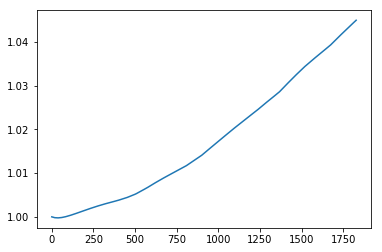

In [567]:
mm1 = (ell[mask]>50) & (ell[mask]<2000)
plt.plot(fd(np.log10(ell*x0)[mask])[mm1])

# test agn owl

z
0.75
1.01114379833
1.01114379833


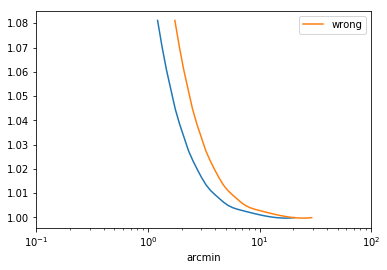

In [81]:


powz = np.loadtxt( 'powtable_z.txt')
powk = np.loadtxt( 'powtable_k.txt')

DM_FILENAME = np.loadtxt(  'powtable_DMONLY_all_P.txt').reshape(len(powk),len(powz))
UPPER_FILENAME = np.loadtxt(  'powtable_NOSN_all_P.txt').reshape(len(powk),len(powz))
LOWER_FILENAME = np.loadtxt(  'powtable_AGN_all_P.txt').reshape(len(powk),len(powz))
binz = 4

import numpy as np


l = np.linspace(1,2000,2000)+0.5
zz = powz[binz]
print "z"
print zz

import cosmolopy.distance as cd
import cosmolopy
om = 0.28
ob = 0.04
ns=1
s8=0.82
h100=0.7
cosmo = {'omega_M_0':om, 
                     'omega_lambda_0':1-om,
                     'omega_k_0': 0.0, 
                     'omega_b_0' : ob,
                     'h':h100,
                     'sigma_8' : s8,
                     'n': ns}


dchis = cd.comoving_distance(zz ,**cosmo)#/(100*cosmo['h'])
kk = l/(dchis*0.7)

l1 = 700

masks = (powk>np.log10(l1/(dchis/0.7)))# & (powk<np.log10(kk[-1]))

%matplotlib inline
import matplotlib.pyplot as plt
masks = (powk>np.log10(kk[0])) & (powk<np.log10(kk[-1]))
lll= 10**powk[masks]*(dchis)
print np.sum(lll*10**DM_FILENAME[masks,binz])/np.sum(lll*10**LOWER_FILENAME[masks,binz])
plt.plot(1./lll*180./np.pi*60.,10**DM_FILENAME[masks,binz]/10**LOWER_FILENAME[masks,binz])

lll= 10**powk[masks]*(dchis*0.7)
print np.sum(lll*10**DM_FILENAME[masks,binz])/np.sum(lll*10**LOWER_FILENAME[masks,binz])

plt.plot(1./lll*180./np.pi*60.,10**DM_FILENAME[masks,binz]/10**LOWER_FILENAME[masks,binz],label="wrong")
plt.xlabel("k")
plt.xlim([0.0001,100])
plt.legend()
plt.xlabel("arcmin")
plt.xlim([0.1,100])
plt.xscale('log', nonposy='clip')

z
0.75
1.04509968792
1.04509968792


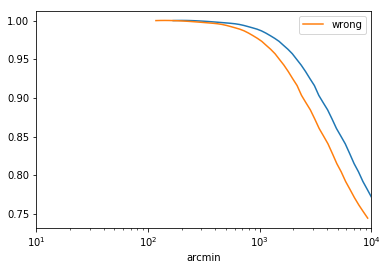

In [90]:


powz = np.loadtxt( 'powtable_z.txt')
powk = np.loadtxt( 'powtable_k.txt')

DM_FILENAME = np.loadtxt(  'powtable_DMONLY_all_P.txt').reshape(len(powk),len(powz))
UPPER_FILENAME = np.loadtxt(  'powtable_NOSN_all_P.txt').reshape(len(powk),len(powz))
LOWER_FILENAME = np.loadtxt(  'powtable_AGN_all_P.txt').reshape(len(powk),len(powz))
binz = 4

import numpy as np


l = np.linspace(1,10000,2000)+0.5
zz = powz[binz]
print "z"
print zz

import cosmolopy.distance as cd
import cosmolopy
om = 0.28
ob = 0.04
ns=1
s8=0.82
h100=0.7
cosmo = {'omega_M_0':om, 
                     'omega_lambda_0':1-om,
                     'omega_k_0': 0.0, 
                     'omega_b_0' : ob,
                     'h':h100,
                     'sigma_8' : s8,
                     'n': ns}


dchis = cd.comoving_distance(zz ,**cosmo)#/(100*cosmo['h'])
kk = l/(dchis*0.7)

l1 = 700

masks = (powk>np.log10(l1/(dchis/0.7)))# & (powk<np.log10(kk[-1]))

%matplotlib inline
import matplotlib.pyplot as plt
masks = (powk>np.log10(kk[0])) & (powk<np.log10(kk[-1]))
lll= 10**powk[masks]*(dchis)
print np.sum(lll*10**DM_FILENAME[masks,binz])/np.sum(lll*10**LOWER_FILENAME[masks,binz])
plt.plot(lll,10**LOWER_FILENAME[masks,binz]/10**DM_FILENAME[masks,binz])

lll= 10**powk[masks]*(dchis*0.7)
print np.sum(lll*10**DM_FILENAME[masks,binz])/np.sum(lll*10**LOWER_FILENAME[masks,binz])

plt.plot(lll,10**LOWER_FILENAME[masks,binz]/10**DM_FILENAME[masks,binz],label="wrong")
plt.xlabel("l")
plt.xlim([10,10000])
plt.legend()
plt.xlabel("arcmin")
#plt.xlim([0.1,100])
plt.xscale('log', nonposy='clip')

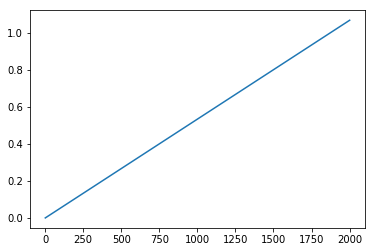

In [74]:
plt.plot(l,l/(dchis*0.7))

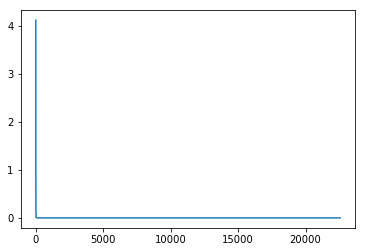

In [391]:
import cosmolopy
cosmo = {'omega_M_0' : 0.27,
'omega_lambda_0' : 1-0.27,
 'omega_b_0' : 0.045,
 'omega_n_0' : 0.0,
 'N_nu' : 0,
 'h' : 0.72,
 'n' : 1.0,
 'sigma_8' : 0.8 }


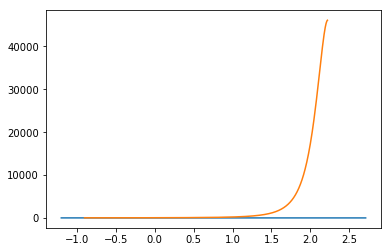

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(dm_k,dm_P[:,0])
mute = np.loadtxt("../pk.txt")
plt.plot(np.log(mute[:,0]),100*mute[:,3])

In [43]:
boia = dm_P.reshape(len(dm_k)*len(dm_z))
dm_P_c = np.zeros((dm_k.shape[0],dm_z.shape[0]))
for i in range(dm_k.shape[0]):
    for j in range(dm_z.shape[0]):
        dm_P_c[i,j] = boia[j+i*dm_z.shape[0]]

In [ ]:
mute = np.loadtxt("powtable_NOSN_all_P.txt")
print len(mute)

mute = np.loadtxt("powtable_DMONLY_all_P.txt")
print len(mute)

mute = np.loadtxt("powtable_AGN_all_P.txt")
print len(mute)

1400